In [5]:
import os 
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt 
from mpl_toolkits import mplot3d
from matplotlib.backends.backend_pdf import PdfPages
from sklearn.cluster import KMeans
#from sklearn.preprocessing import MaxAbsScaler, StandardScaler
#import sklearn.metrics as metric

In [2]:
df = pd.read_pickle("blind_cameras_dataset\\drdf_arrays.pkl")
df2arr = df.pixels.to_numpy()
arr3d = np.stack(df2arr)
data = arr3d.reshape(df2arr.shape[0],32*32)

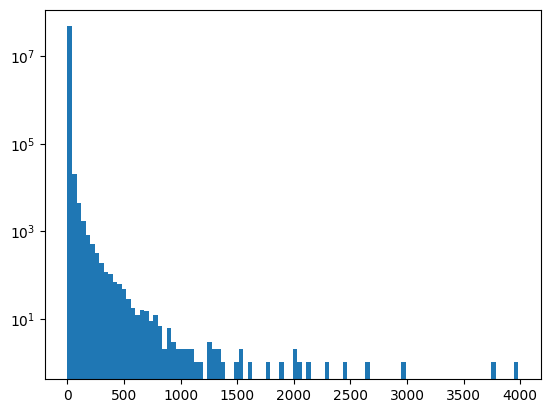

In [3]:
plt.hist(data.reshape(-1,1),100)
plt.yscale('log')

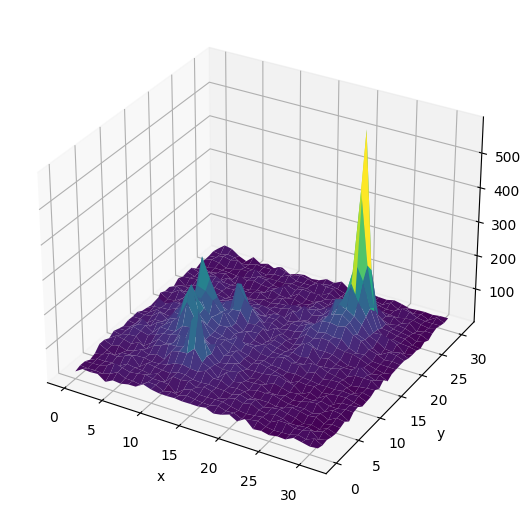

In [32]:
data_num = 42015
fig = plt.figure()
ax = plt.axes(projection='3d')

a = np.arange(32)
x,y = np.meshgrid(a,a)
z = arr3d[data_num]

ax.plot_surface(x,y,z,cmap='viridis')
ax.set_xlabel('x')
ax.set_ylabel('y')

fig.set_figheight(10)

In [4]:
#data_num = 42015

med = skimage.filters.median(arr3d[data_num])
med = skimage.filters.gaussian(arr3d[data_num]) #sigma? mode?
hess = skimage.filters.hessian(arr3d[data_num]) #sigmas? scale_range?
thr_iso = skimage.filters.threshold_isodata(image=arr3d[data_num], nbins=32*32)
thr_loc = skimage.filters.threshold_local(arr3d[data_num], 4) #method='gaussian'
thr_mean = skimage.filters.threshold_mean(arr3d[data_num])
thr_min = skimage.filters.threshold_minimum(image=arr3d[data_num], nbins=32*32)

NameError: name 'skimage' is not defined

In [ ]:
data_num = 42015

fig, ax = plt.subplots(1,2)
cam0 = ax[0].pcolormesh(arr3d[data_num])
plt.colorbar(cam0)
ax[0].set_title('non scaled')

cam = ax[1].pcolormesh(scaled2.reshape(-1,32,32)[data_num])
plt.colorbar(cam)
ax[1].set_title('scaled')

fig.set_figwidth(15)